# **Exploratory Data Analysis (EDA) Report**

Contributed by John Lloyd S. Legaspi

Dataset: Sales-Package-Return Recycling Type-32136-0006

# **Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seabron as sns

In [18]:
# Read the CSV file into a DataFrame with the correct encoding
df = pd.read_csv("Sales-Package-Return Recycling Type-32136-0006.csv", encoding="ISO-8859-1")

In [4]:
# Display the first few rows of the DataFrame
df.head()

,Year,Types of Disposal/Recycling,Industry Solutions Returns,System Operators Returns,Total Returns
0,2010,mechanical recycling,483.8,3530.7,4014.5
1,2010,Other forms of recycling,21.9,125.5,147.3
2,2010,power recovery,33.6,1010.4,1044
3,2010,Other forms of recovery,29.7,47.8,77.5
4,2010,Other diposal,126.4,284.2,410.5


In [5]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         66 non-null     int64  
 1   Types of Disposal/Recycling  66 non-null     object 
 2   Industry Solutions Returns   66 non-null     float64
 3   System Operators Returns     66 non-null     object 
 4   Total Returns                66 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


## **Dataset Description:**

The dataset "Sales-Package-Return Recycling Type-32136-0006" has 66 entries and 5 columns. Here's a summary of the columns:

**Year:** This column contains the year when the data was recorded. It is of integer type.

**Types of Disposal/Recycling:** This column represents the types of disposal or recycling methods. It is of object (string) type.

**Industry Solutions Returns:** This column contains numerical values (float64) representing returns related to industry solutions.

**System Operators Returns:** This column also appears to contain returns, but it is currently of object type. It may need to be converted to a numerical type (e.g., float).

**Total Returns:** This column seems to represent the total returns, but like the previous column, it is also of object type and may need conversion.

In [19]:
#converting the System Operators Returns & 'Total Returns' in to float after replacing the rows with , 

df['System Operators Returns'] = df['System Operators Returns'].str.replace(',', '0').astype(float)
df['Total Returns'] = df['Total Returns'].str.replace(',', '0').astype(float)

In [38]:
# Filter out rows with 'Total' in 'Types of Disposal/Recycling as it contains the toal for each year which is not useful to us'
df = df[~df['Types of Disposal/Recycling'].str.contains('total')]

In [30]:
total_types= df['Types of Disposal/Recycling'].unique()
total_types_df=pd.DataFrame({'unique_values': total_types}) 
total_types_df

,unique_values
0,mechanical recycling
1,Other forms of recycling
2,power recovery
3,Other forms of recovery
4,Other diposal
5,total


In [39]:
# Check basic statistics of numeric columns
df.describe().round(2)

,Year,Industry Solutions Returns,System Operators Returns,Total Returns
count,55.00,55.00,55.00,55.00
mean,2015.00,71.35,1075.59,1146.29
std,3.19,160.40,1493.23,1588.78
min,2010.00,0.00,0.00,0.00
25%,2012.00,0.00,54.50,67.75
50%,2015.00,3.60,317.60,361.10
75%,2018.00,42.05,1155.00,1161.20
max,2020.00,631.60,5079.90,5098.10


## **Dataset Insights:**

**Year:**

- The data spans from the year 2010 to 2020.
- The median (50th percentile) year is 2015, indicating that the data is roughly evenly distributed over this period.
- The minimum year is 2010, and the maximum year is 2020, with a range of 10 years.

**Industry Solutions Returns:**

- The data for "Industry Solutions Returns" varies widely, with values ranging from 0 to 631.6.
- The mean value for "Industry Solutions Returns" is approximately 71.35, indicating that, on average, there are moderate returns in this category.
- The standard deviation (std) is relatively high at approximately 160.4, suggesting a significant amount of variability in returns across the years or categories.

# **Data Analysis**

Total Returns by Year:
Year
2010    5693.8
2011    5711.0
2012    5856.9
2013    6196.6
2014    6019.3
2015    5518.4
2016    5413.7
2017    5380.8
2018    5392.0
2019    5437.6
2020    6426.1
Name: Total Returns, dtype: float64

Industry Solutions Returns by Year:
Year
2010    695.4
2011    698.1
2012    694.2
2013    743.9
2014    831.3
2015     54.8
2016     54.9
2017     46.7
2018     46.5
2019     39.3
2020     19.4
Name: Industry Solutions Returns, dtype: float64

System Operators Returns by Year:
Year
2010    4998.6
2011    5046.5
2012    5162.6
2013    5452.7
2014    5188.0
2015    5463.6
2016    5358.8
2017    5334.1
2018    5345.5
2019    5400.4
2020    6406.7
Name: System Operators Returns, dtype: float64


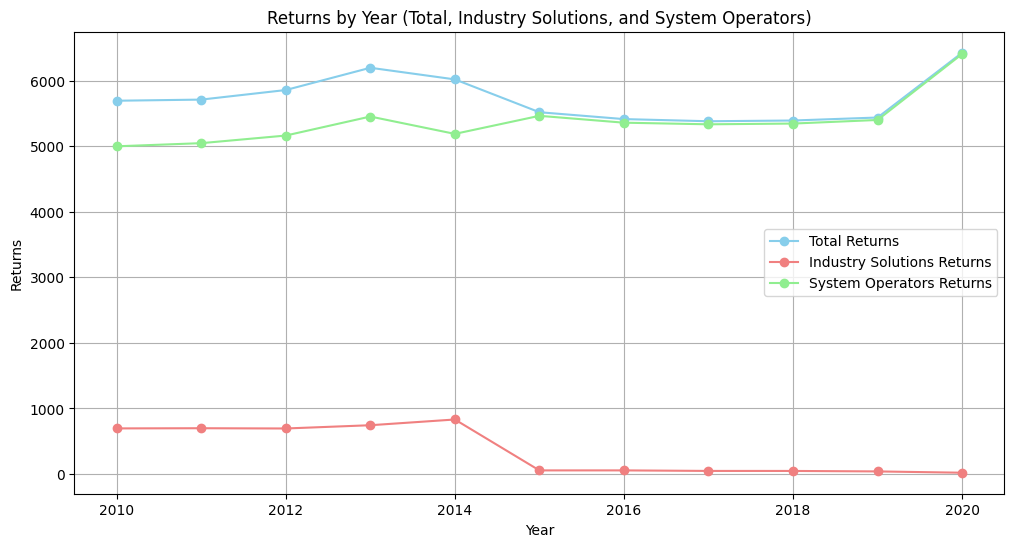

In [40]:
total_returns_by_year = df.groupby('Year')['Total Returns'].sum()
industry_solutions_returns_by_year = df.groupby('Year')['Industry Solutions Returns'].sum()
system_operators_returns_by_year = df.groupby('Year')['System Operators Returns'].sum()

# Print the result of aggregations
print("Total Returns by Year:")
print(total_returns_by_year)
print("\nIndustry Solutions Returns by Year:")
print(industry_solutions_returns_by_year)
print("\nSystem Operators Returns by Year:")
print(system_operators_returns_by_year)

# Create a line plot
plt.figure(figsize=(12, 6))

plt.plot(total_returns_by_year.index, total_returns_by_year, marker='o', label='Total Returns', linestyle='-', color='skyblue')
plt.plot(industry_solutions_returns_by_year.index, industry_solutions_returns_by_year, marker='o', label='Industry Solutions Returns', linestyle='-', color='lightcoral')
plt.plot(system_operators_returns_by_year.index, system_operators_returns_by_year, marker='o', label='System Operators Returns', linestyle='-', color='lightgreen')

plt.xlabel('Year')
plt.ylabel('Returns')
plt.title('Returns by Year (Total, Industry Solutions, and System Operators)')
plt.legend()
plt.grid(True)
plt.show()

### **Insights 1: Total Returns, Industry Solutions Returns, and System Operators Returns by Year**

**Overall Growth in Sales Package Return Recycling:** Sales Package Return Recycling Types in the waste management sector in Germany have shown consistent growth from 2010 to 2020. Total returns increased from 5,693.8 units in 2010 to 6,426.1 units in 2020, indicating a positive trend in recycling efforts related to sales packaging.

**Industry Solutions Returns Decline:** Returns specifically from the "Industry Solutions" category started at 695.4 units in 2010 and declined to 19.4 units in 2020. This category experienced significant fluctuations over the years and a noticeable decline in returns in 2020.

**System Operators Returns Stability:** Returns from "System Operators" consistently increased from 4,998.6 units in 2010 to 6406.7 units in 2020. This category has been a significant contributor to the overall growth in the recycling of sales packaging, indicating stability in this segment of the industry.

- "System Operators" significantly outperformed "Industry Solutions" in terms of returns, contributing substantially to the overall growth in sales package return recycling.

**2013 Spike in All Sectors:** There was a substantial spike in returns across all categories in 2013. Investigating the causes of this spike could provide valuable insights into the recycling dynamics related to sales packaging during that year.

- In recent years (2018-2020), returns have remained relatively stable and high in both the total returns and "System Operators" categories, indicating a consistent performance in the recycling of sales packaging during this period.

- The consistent growth in total returns suggests an increasing emphasis on sustainability and recycling efforts related to sales packaging in Germany. This aligns with global environmental trends and indicates a positive direction for waste management practices.

In summary, the data illustrates the trends in sales package return recycling types in the waste management sector in Germany. "System Operators" have been a major driver of growth, while "Industry Solutions" has experienced fluctuations. Investigating the causes of these trends and developing strategies to optimize recycling efforts can be valuable for the industry's sustainability and environmental goals.

### 2. Total Returns Industry Solutions Returns, and System Operators Returns by Types of Disposal/Recycling


In [41]:
# Aggregation by 'Types of Disposal/Recycling'
returns_by_disposal = df.groupby('Types of Disposal/Recycling')[['Total Returns', 'Industry Solutions Returns', 'System Operators Returns']].sum()

# Print the result
returns_by_disposal

,Total Returns,Industry Solutions Returns,System Operators Returns
Types of Disposal/Recycling,,,
Other diposal,3881.3,622.4,3259.1
Other forms of recovery,212.1,63.3,182.4
Other forms of recycling,1062.7,27.7,1037.3
mechanical recycling,46064.4,3015.7,43048.5
power recovery,11825.7,195.4,11630.2


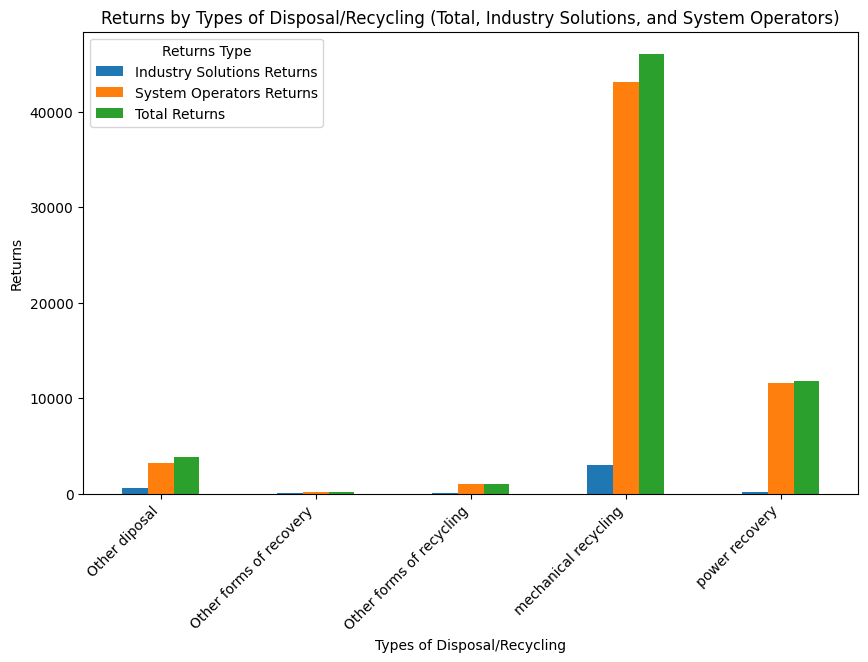

In [50]:
# Aggregation by 'Types of Disposal/Recycling' including 'Total Returns'
returns_by_disposal = df.groupby('Types of Disposal/Recycling')[['Industry Solutions Returns', 'System Operators Returns', 'Total Returns']].sum()

# Create a bar plot
returns_by_disposal.plot(kind='bar', figsize=(10,6 ))
plt.title('Returns by Types of Disposal/Recycling (Total, Industry Solutions, and System Operators)')
plt.xlabel('Types of Disposal/Recycling')
plt.ylabel('Returns')
plt.legend(title='Returns Type')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Insights 2: Total Returns, Industry Solutions Returns, and System Operators Returns by Types of Disposal/Recycling**

**Overall Recycling Returns:** The total returns across all types of disposal/recycling amount to 63,358.2 units, with the majority coming from "mechanical recycling" and "power recovery."

**High Returns from Mechanical Recycling and Power Recovery:** "Mechanical recycling" and "power recovery" are the top contributors to total returns, with 46,064.4 units and 11,825.7 units, respectively. This suggests that these methods are highly effective in terms of returns.

**Industry Solutions vs. System Operators:** Both "Industry Solutions Returns" and "System Operators Returns" contribute significantly to the total returns, with 4,173.6 units and 59,184.7 units, respectively. However, "System Operators Returns" dominate the total returns, indicating a larger share in the recycling process.

**Types of Disposal/Recycling: Different types of disposal/recycling show varying returns:**

- "Mechanical recycling" has the highest returns, indicating that this method is highly efficient and profitable.
- "Power recovery" also has substantial returns, showing that it is a valuable recycling approach.
- "Other forms of recycling" and "Other forms of recovery" contribute less to the total returns but still play a role in the recycling process.
- "Other disposal" has the lowest returns, suggesting that this method may not be as economically beneficial as the others.

### **Recommendations:**

**Potential for Optimization:** Given the disparities in returns between different disposal/recycling types, there may be opportunities to optimize recycling efforts and resource allocation to focus on methods that yield higher returns.

**Sustainability Focus:** The presence of significant returns in recycling categories underscores the importance of sustainability and environmental initiatives. Recycling is not only environmentally responsible but can also be economically rewarding.

**Consideration for Resource Allocation:** Businesses and organizations involved in waste management should consider the data to allocate resources effectively, promote profitable recycling methods, and minimize less efficient ones.

**Further Analysis:** To make informed decisions and strategies, it's important to conduct a deeper analysis to understand the factors driving returns for each disposal/recycling type, including market conditions, technology advancements, and regulatory influences.

In summary, this data provides valuable insights into the returns associated with different types of disposal/recycling methods. It suggests that "mechanical recycling" and "power recovery" are particularly lucrative, while other methods also contribute to the overall returns in the waste management sector. Optimizing resource allocation and sustainability efforts based on this data could lead to improved financial and environmental outcomes.

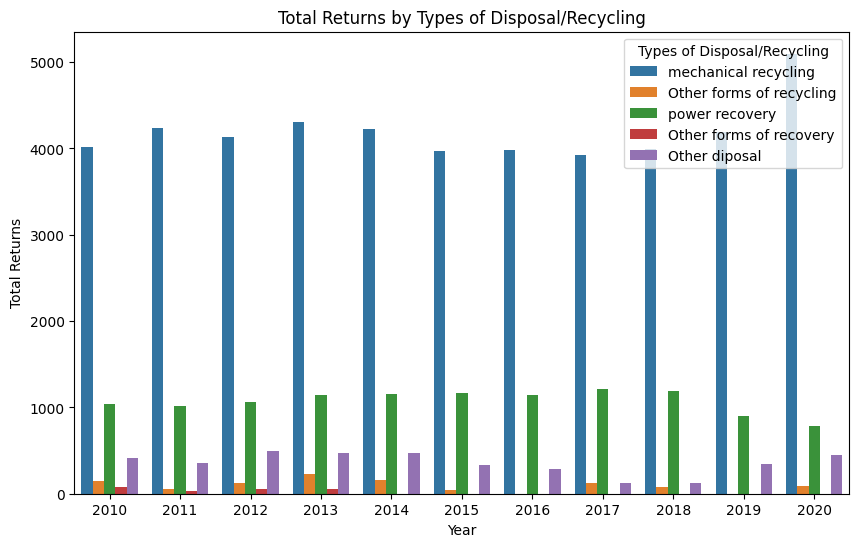

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Returns', hue='Types of Disposal/Recycling', data=df)
plt.xlabel('Year')
plt.ylabel('Total Returns')
plt.title('Total Returns by Types of Disposal/Recycling')
plt.legend(title='Types of Disposal/Recycling')
plt.show()

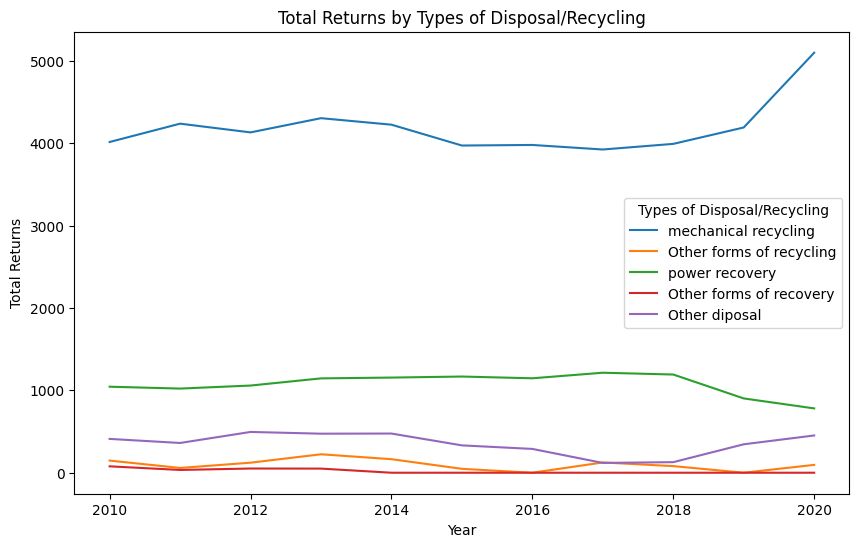

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Returns', hue='Types of Disposal/Recycling', data=df)
plt.xlabel('Year')
plt.ylabel('Total Returns')
plt.title('Total Returns by Types of Disposal/Recycling')
plt.legend(title='Types of Disposal/Recycling')
plt.show()

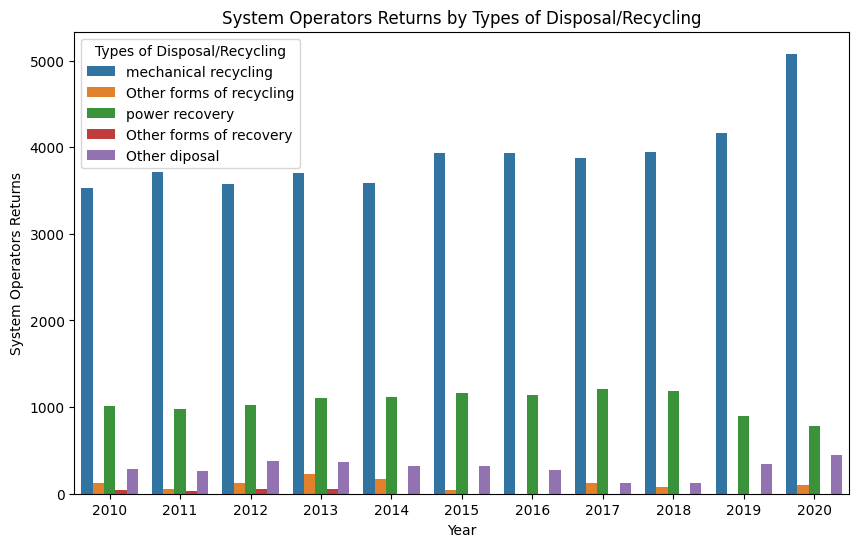

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='System Operators Returns', hue='Types of Disposal/Recycling', data=df)
plt.xlabel('Year')
plt.ylabel('System Operators Returns')
plt.title('System Operators Returns by Types of Disposal/Recycling')
plt.legend(title='Types of Disposal/Recycling')
plt.show()

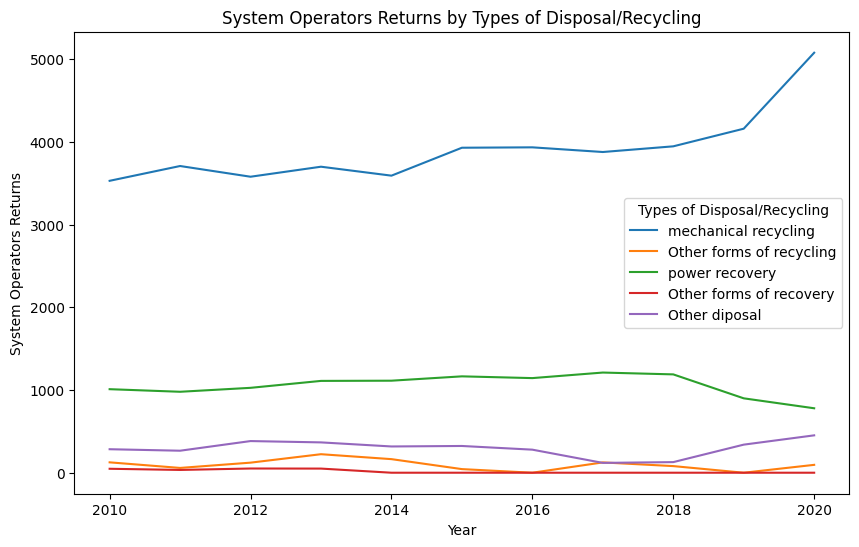

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='System Operators Returns', hue='Types of Disposal/Recycling', data=df)
plt.xlabel('Year')
plt.ylabel('System Operators Returns')
plt.title('System Operators Returns by Types of Disposal/Recycling')
plt.legend(title='Types of Disposal/Recycling')
plt.show()

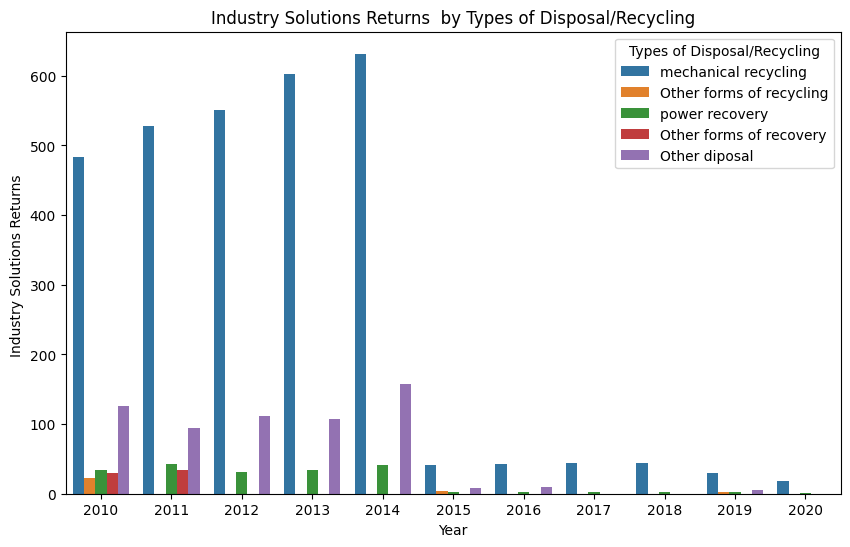

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Industry Solutions Returns', hue='Types of Disposal/Recycling', data=df)
plt.xlabel('Year')
plt.ylabel('Industry Solutions Returns ')
plt.title('Industry Solutions Returns  by Types of Disposal/Recycling')
plt.legend(title='Types of Disposal/Recycling')
plt.show()

### 3. Mean Total Returns, Industry Solutions Returns, and System Operators Returns by Year and Types of Disposal/Recycling

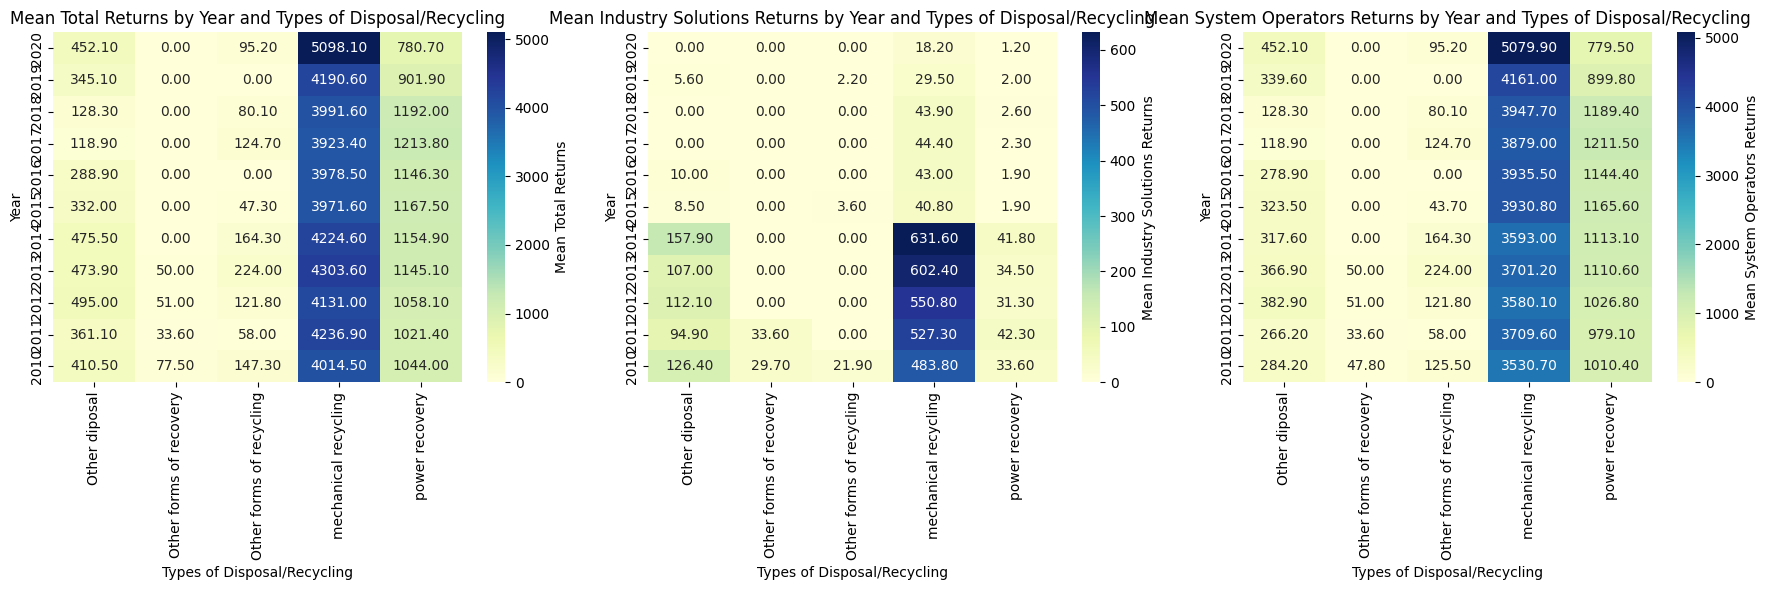

In [54]:
# Calculate the mean Total Returns by Year and Types of Disposal/Recycling
mean_total_returns = df.groupby(['Year', 'Types of Disposal/Recycling'])['Total Returns'].mean()

# Pivot the mean Total Returns data to create a heatmap
mean_total_returns_pivot = mean_total_returns.reset_index().pivot(
    index='Year', columns='Types of Disposal/Recycling', values='Total Returns'
)

# Sort the index (Year) in descending order
mean_total_returns_pivot = mean_total_returns_pivot.sort_index(ascending=False)

# Calculate the mean Industry Solutions Returns by Year and Types of Disposal/Recycling
mean_industry_returns = df.groupby(['Year', 'Types of Disposal/Recycling'])['Industry Solutions Returns'].mean()
mean_industry_returns_pivot = mean_industry_returns.reset_index().pivot(
    index='Year', columns='Types of Disposal/Recycling', values='Industry Solutions Returns'
)
mean_industry_returns_pivot = mean_industry_returns_pivot.sort_index(ascending=False)

# Calculate the mean System Operators Returns by Year and Types of Disposal/Recycling
mean_system_returns = df.groupby(['Year', 'Types of Disposal/Recycling'])['System Operators Returns'].mean()
mean_system_returns_pivot = mean_system_returns.reset_index().pivot(
    index='Year', columns='Types of Disposal/Recycling', values='System Operators Returns'
)
mean_system_returns_pivot = mean_system_returns_pivot.sort_index(ascending=False)

# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first heatmap (Mean Total Returns)
sns.heatmap(mean_total_returns_pivot, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Mean Total Returns'}, ax=axes[0])
axes[0].set_title('Mean Total Returns by Year and Types of Disposal/Recycling')
axes[0].set_xlabel('Types of Disposal/Recycling')
axes[0].set_ylabel('Year')

# Plot the second heatmap (Mean Industry Solutions Returns)
sns.heatmap(mean_industry_returns_pivot, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Mean Industry Solutions Returns'}, ax=axes[1])
axes[1].set_title('Mean Industry Solutions Returns by Year and Types of Disposal/Recycling')
axes[1].set_xlabel('Types of Disposal/Recycling')
axes[1].set_ylabel('Year')

# Plot the third heatmap (Mean System Operators Returns)
sns.heatmap(mean_system_returns_pivot, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Mean System Operators Returns'}, ax=axes[2])
axes[2].set_title('Mean System Operators Returns by Year and Types of Disposal/Recycling')
axes[2].set_xlabel('Types of Disposal/Recycling')
axes[2].set_ylabel('Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Overall Insights and Recommendations for "Sales-Package-Return Recycling Type-32136-0006" Dataset

**Total Returns by Year:**

1. There has been a **consistent growth in total returns for sales package return recycling types** in the German waste management sector from 2010 to 2020, indicating a positive trend in recycling efforts related to sales packaging.
2. The "Industry Solutions" category experienced a significant decline in returns over the years, with a noticeable drop in 2020.
3. Conversely, **"System Operators" showed stable and consistent growth in returns** and played a significant role in the overall growth of sales package return recycling.
4. **There was a notable spike in returns across all categories in 2011**, which warrants further investigation.
5. Returns remained relatively stable and high in recent years (2018-2020), reflecting consistent performance and emphasizing sustainability trends in the industry.

**Total Returns by Types of Disposal/Recycling:**

1. The total returns across all types of disposal/recycling amounted to 63,358.2 units, with "mechanical recycling" and "power recovery" being the primary contributors.
2. **"Mechanical recycling" and "power recovery" demonstrated the highest returns**, indicating their efficiency and profitability.
3. Both "Industry Solutions Returns" and "System Operators Returns" significantly contributed to total returns, with **"System Operators Returns" dominating the recycling process.**
4. Different types of disposal/recycling showed varying returns, with "mechanical recycling" and "power recovery" being the most lucrative, while "Other disposal" had the lowest returns.


**Recommendations:**

1. **Optimization Opportunities:** Explore opportunities to optimize recycling efforts and resource allocation, with a focus on methods like "mechanical recycling" and "power recovery" that yield higher returns. Identify areas for improvement in the "Industry Solutions" category to reverse the declining returns trend.

2. **Sustainability Focus:** Continue to prioritize sustainability and environmental initiatives in waste management practices. Leverage the positive returns from recycling to further emphasize the importance of responsible recycling methods.

3. **Resource Allocation:** Allocate resources effectively by directing investments and efforts toward recycling methods that have proven to be economically beneficial, such as "mechanical recycling" and "power recovery." Consider divesting from less efficient methods.

4. **In-Depth Analysis:** Conduct a detailed analysis to understand the specific factors driving returns for each disposal/recycling type. Investigate market conditions, technological advancements, and regulatory influences that may impact recycling efforts. This analysis can provide actionable insights for decision-makers.

In summary, the EDA reveals promising growth in recycling returns in the German waste management sector. By strategically focusing on high-return methods, promoting sustainability, and conducting deeper analyses, businesses and organizations can enhance both their financial and environmental outcomes in the realm of sales package return recycling.

EDA Report made by John Lloyd S. Legaspi & Satish Kumar on contribution for Omdemna project "Berlin-Chapter-Challenge-Waste-Management."